In [ ]:
# cargar librerias-----------------------------------------------
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
# guardar dni preparado------------------------------------------
numero_dni = 28237252
lista_dni = [2, 8, 2, 3, 7, 2, 5, 2]
# crear conjunto de datos----------------------------------------
n_muestra = 200 + 10 * lista_dni[0]
n_predictores = 10 + lista_dni[1] + lista_dni[2]
n_informativas = 10 + lista_dni[1]
n_redundantes = 0
y_aleatorias = 0.01 * lista_dni[3]
semilla = numero_dni
from sklearn.datasets import make_classification
X_0, y_0 = make_classification(n_samples = n_muestra, n_features = n_predictores,
shuffle = False, n_redundant = n_redundantes, random_state = semilla,flip_y = y_aleatorias)
# muestra de entrenamiento

In [ ]:
X = X_0[0:200, :]
y = y_0[0:200]
# muestra de validacion
X_val = X_0[200:len(X_0)+1, :]
y_val = y_0[200:len(y_0)+1]
# comprobacion particion
X_0.shape

(220, 20)

In [ ]:
X.shape

(200, 20)

In [ ]:
X_val.shape

(20, 20)

In [ ]:
y_0.shape

(220,)

In [ ]:
y.shape

(200,)

In [ ]:
y_val.shape

(20,)

In [ ]:
# descriptivo de la base de datos--------------------------------
import matplotlib
import matplotlib.pyplot as plt
nombre_variables = ["x%d" % i for i in range(1, n_predictores + 1)]
df_X = pd.DataFrame(data=X[0:,0:], columns = nombre_variables)
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   x3      200 non-null    float64
 3   x4      200 non-null    float64
 4   x5      200 non-null    float64
 5   x6      200 non-null    float64
 6   x7      200 non-null    float64
 7   x8      200 non-null    float64
 8   x9      200 non-null    float64
 9   x10     200 non-null    float64
 10  x11     200 non-null    float64
 11  x12     200 non-null    float64
 12  x13     200 non-null    float64
 13  x14     200 non-null    float64
 14  x15     200 non-null    float64
 15  x16     200 non-null    float64
 16  x17     200 non-null    float64
 17  x18     200 non-null    float64
 18  x19     200 non-null    float64
 19  x20     200 non-null    float64
dtypes: float64(20)
memory usage: 31.4 KB


In [ ]:
df_X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.079975,-0.097565,-0.119048,-0.054973,-0.000329,-0.002156,-0.092797,-0.103011,-0.023503,0.029397,-0.020512,0.101936,-0.100676,0.117262,-0.022904,0.026832,0.009271,0.127066,0.116895,-0.135433
std,1.394211,1.222993,0.959565,1.020770,1.074632,0.918467,1.009990,1.050819,1.051527,0.971470,0.993270,1.051598,1.027408,0.975404,0.913123,1.079720,1.091643,0.965194,0.967732,1.048587
min,-3.079863,-2.629229,-2.793604,-3.357758,-2.889881,-2.574511,-3.074461,-2.518535,-3.219800,-2.625794,-2.746248,-2.651261,-3.592463,-2.609612,-2.203140,-2.685570,-2.932272,-2.654603,-2.569176,-2.853088
25%,-1.112442,-1.069669,-0.765809,-0.748773,-0.705225,-0.500874,-0.822712,-0.907548,-0.680079,-0.620596,-0.722659,-0.673785,-0.738674,-0.478497,-0.639675,-0.665232,-0.743758,-0.529798,-0.482838,-0.767900
50%,-0.079209,-0.394065,-0.104056,-0.045528,-0.073509,-0.016364,-0.022682,-0.185367,-0.087341,0.006659,0.016873,0.124042,-0.140886,0.020134,0.025017,0.093759,0.059033,0.121062,0.104738,-0.093671
75%,1.051295,0.901156,0.386394,0.594674,0.663956,0.691731,0.548877,0.723971,0.678592,0.594505,0.580433,0.857903,0.587302,0.704960,0.586339,0.751574,0.804095,0.753355,0.823164,0.653951
max,3.219626,3.463529,2.933227,2.864489,3.195342,2.103850,2.410342,2.980869,2.829004,3.352170,2.988045,2.975351,3.107652,2.829877,2.600046,3.138101,2.561440,2.852370,2.322565,2.252777


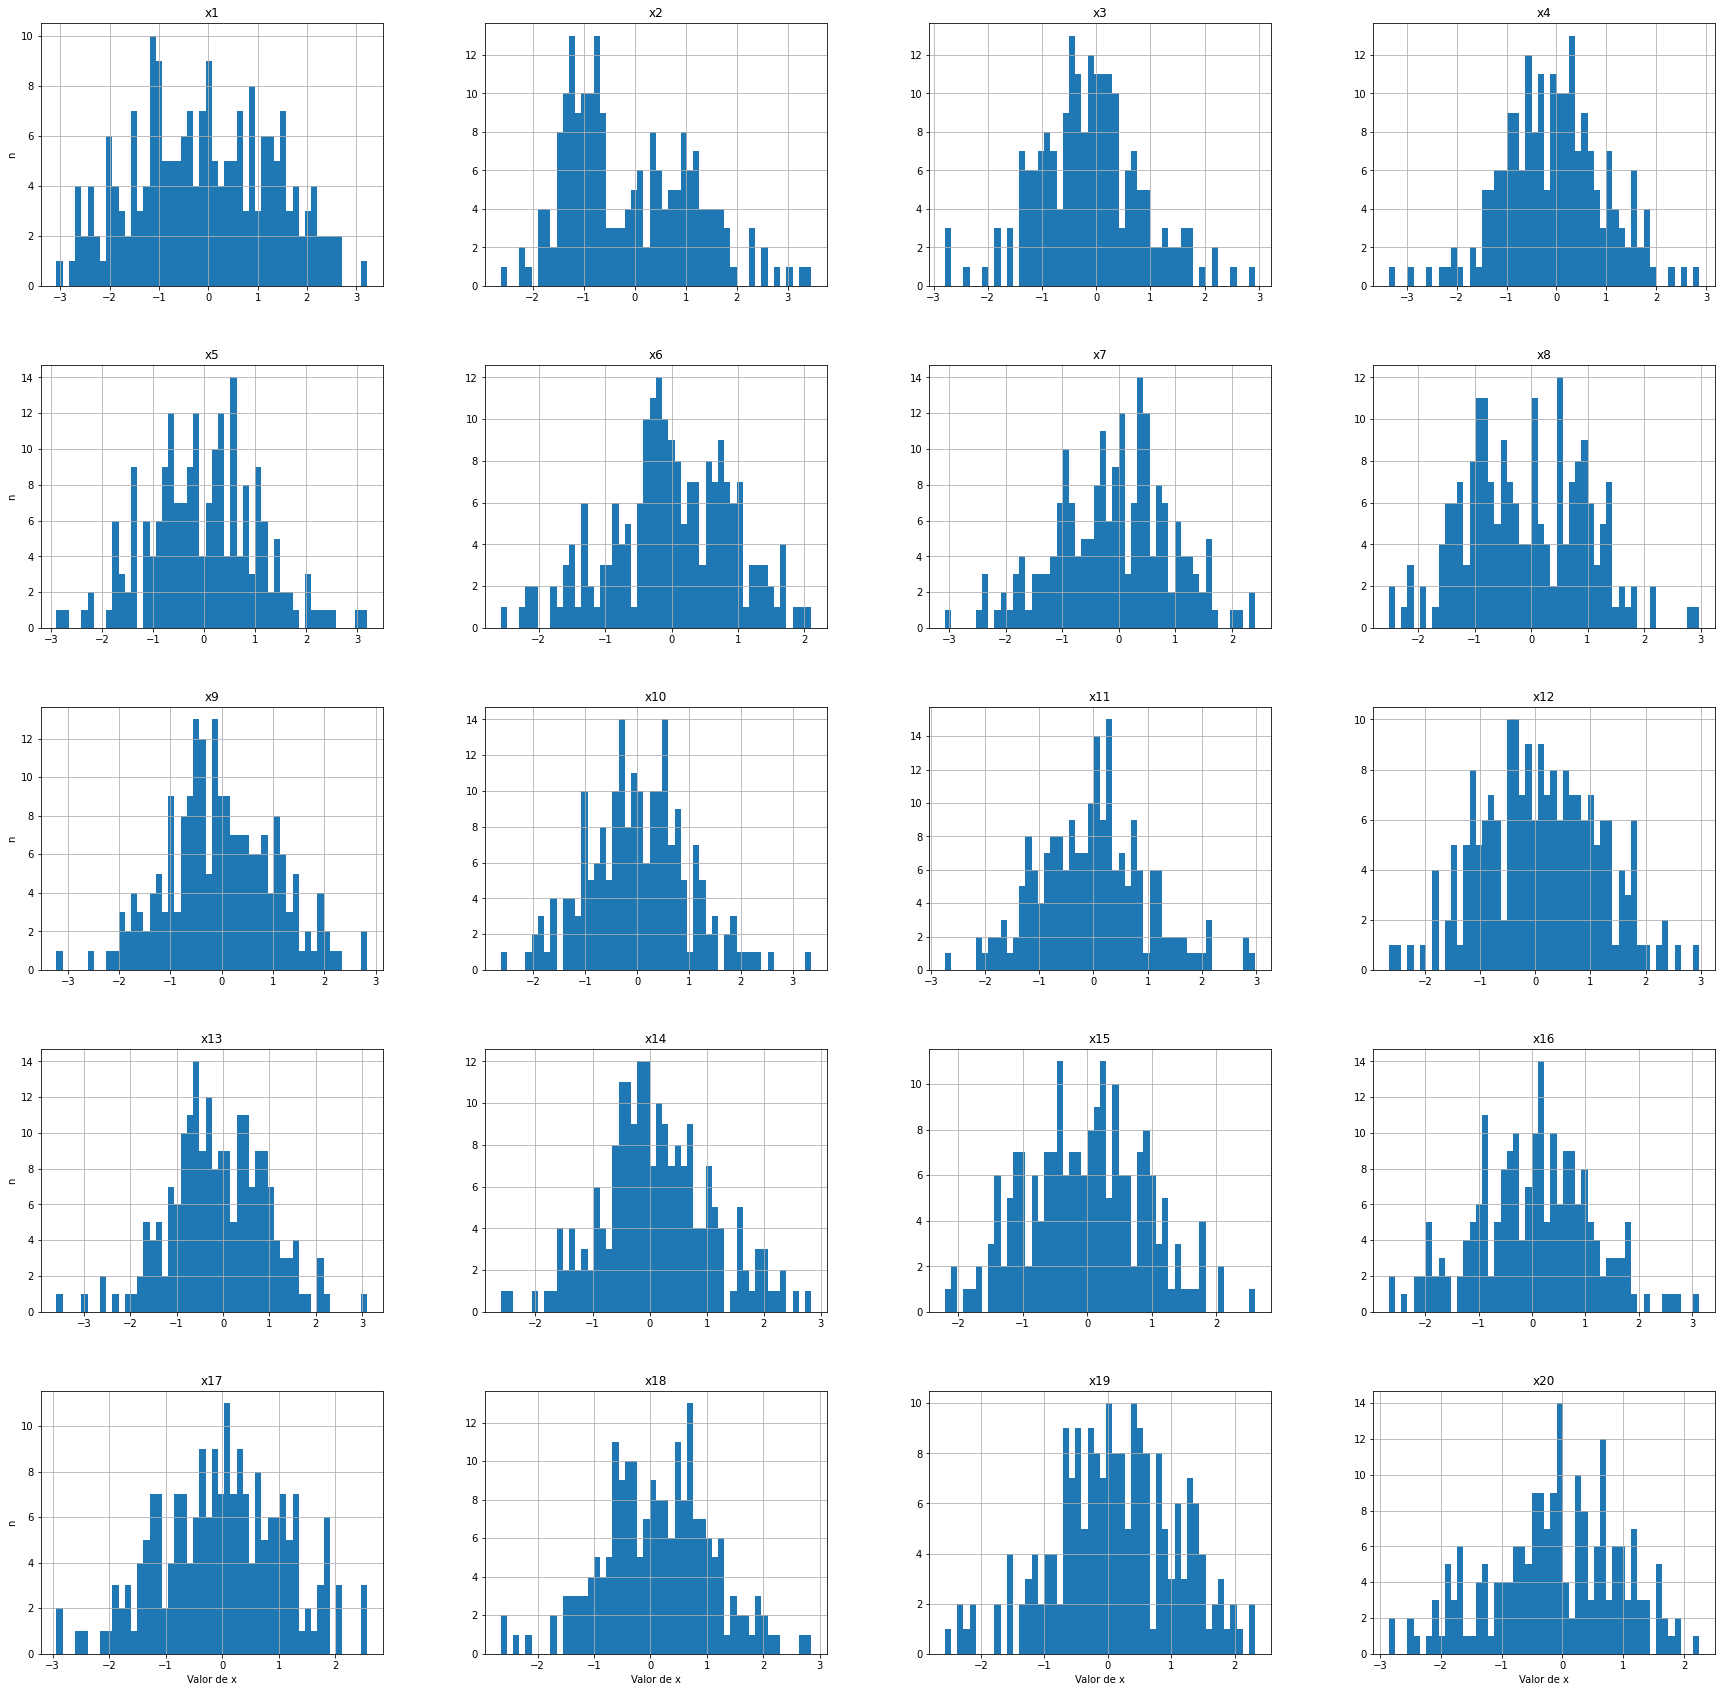

In [ ]:
fig, axes = plt.subplots(nrows =5, ncols = 4, figsize = (30,30))
df_X.hist(bins = 50, ax = axes);
plt.setp(axes[-1, :], xlabel = 'Valor de x');
plt.setp(axes[:, 0], ylabel = 'n');
plt.show();

In [ ]:
# descriptivo de la base de datos--------------------------------
name_y = ["y"]
df_y = pd.DataFrame(data = y.flatten(), columns = name_y)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [ ]:
df_y.value_counts()

y
0    110
1     90
dtype: int64

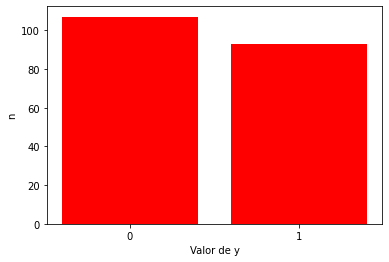

In [ ]:
plt.bar([0, 1], [107, 93], color = "red");
plt.xticks([0, 1]);
plt.xlabel("Valor de y");
plt.ylabel("n");
plt.show();

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# crear el objeto de clase arbol---------------------------------
tree_clf = DecisionTreeClassifier(random_state = semilla)
# ajustar el arbol----------------------------------------------- 
tree_clf.fit(X, y);

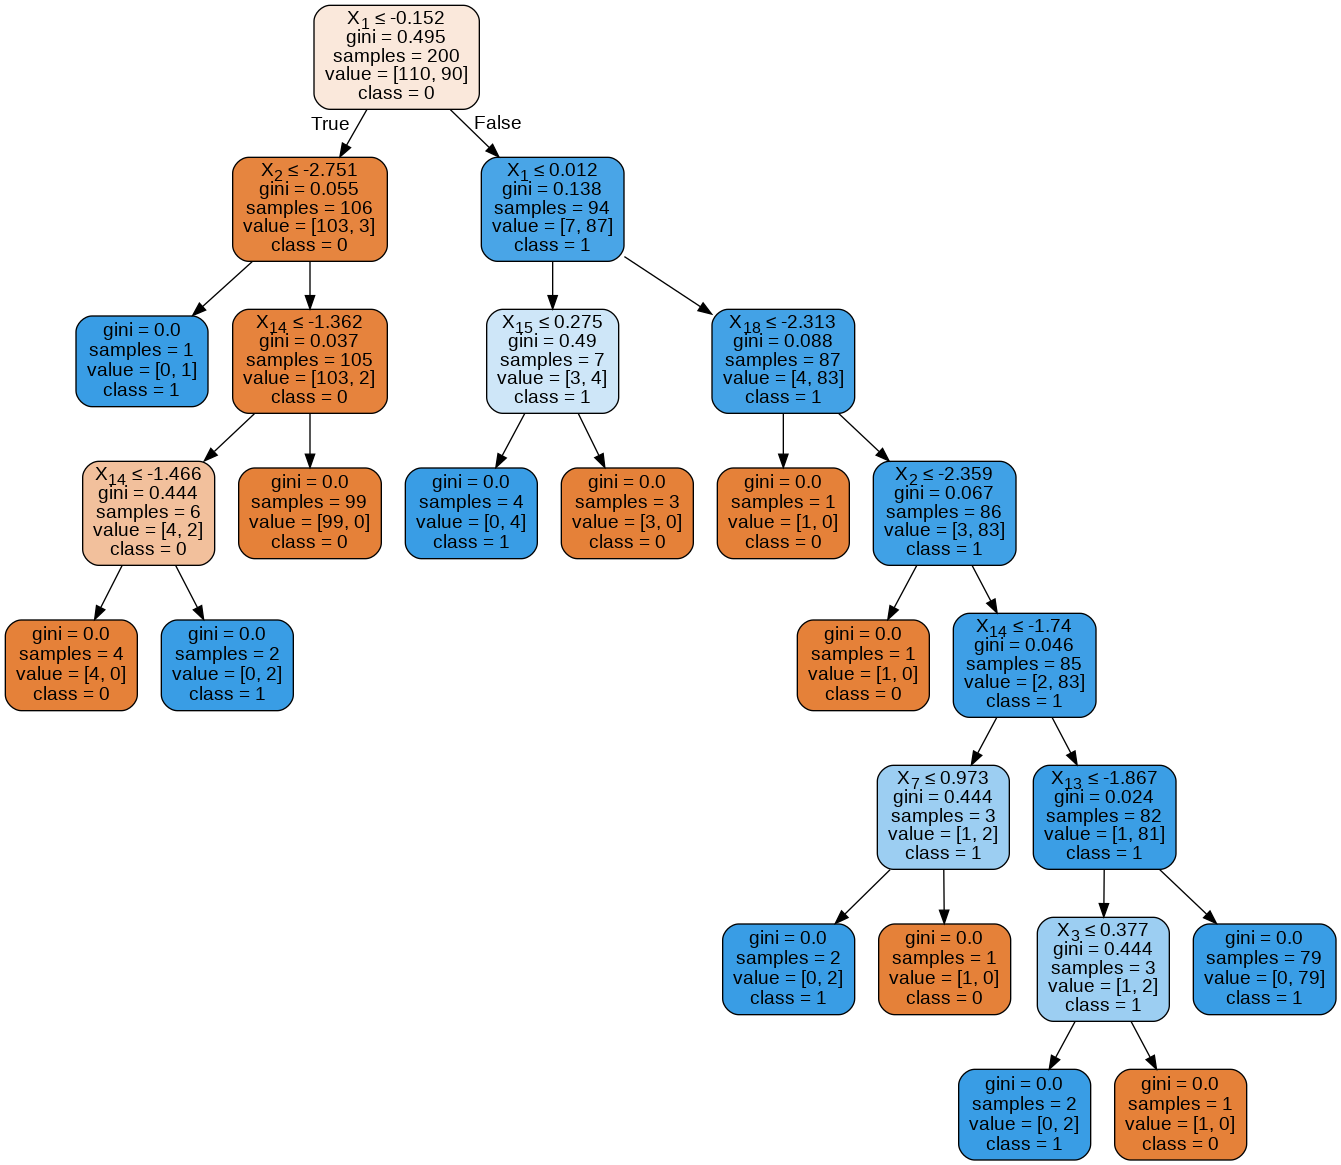

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.metrics import accuracy_score
import pydotplus

# crear el objeto de clase arbol---------------------------------
tree_clf = DecisionTreeClassifier(random_state = semilla)
# ajustar el arbol----------------------------------------------- 
tree_clf.fit(X, y);

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                #feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
# crear el objeto de clase arbol fijando profundidad maxima a 3--
tree_clf_b = DecisionTreeClassifier(random_state = semilla, max_depth = 3)
# ajustar el arbol----------------------------------------------- 
tree_clf_b.fit(X, y);

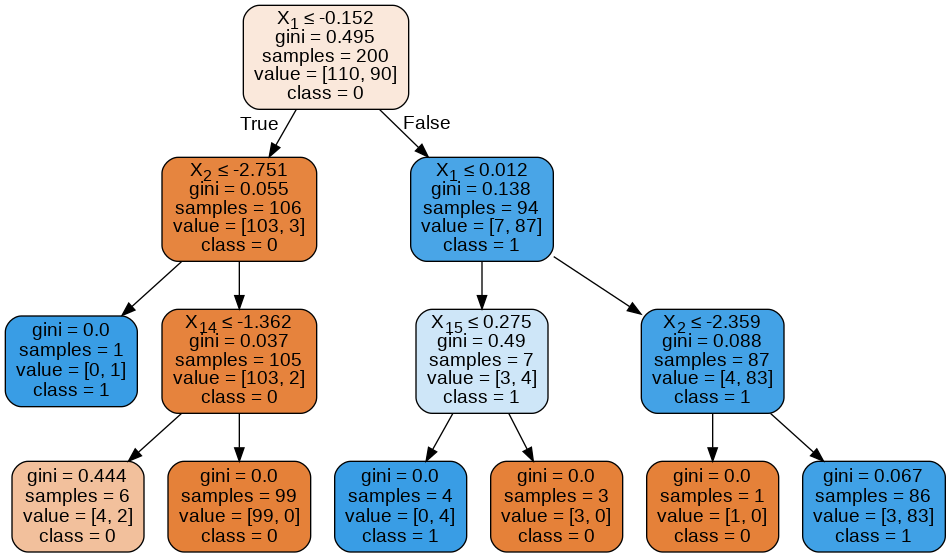

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf_b, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                #feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
# comparar con los resultados de un arbol de decision------------
from sklearn.metrics import accuracy_score
y_pred_tree = tree_clf.predict(X_val);
print(accuracy_score(y_val, y_pred_tree))

0.95


In [ ]:
y_pred_tree_b = tree_clf_b.predict(X_val);
print(accuracy_score(y_val, y_pred_tree_b))

1.0


In [ ]:
# cargar libs
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# crear objeto de la clase BaggingClassifier--------------------- 
bag_clf = BaggingClassifier(
  DecisionTreeClassifier(random_state = semilla), n_estimators = 500,
  max_samples = 200, bootstrap = True, random_state = semilla);
# ajustar el modelo----------------------------------------------
bag_clf.fit(X, y);

In [ ]:
# obtener estimaciones del modelo sobre la muestra de test-------
y_pred = bag_clf.predict(X_val)
# comprobar resultados-------------------------------------------
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.95


In [ ]:
# crear objeto de la clase BaggingClassifier---------------------
pas_clf = BaggingClassifier(
  DecisionTreeClassifier(random_state = semilla), n_estimators = 500,
  max_samples = 200, bootstrap=False, random_state = semilla);
# ajustar el modelo----------------------------------------------
pas_clf.fit(X, y);
# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_pas = pas_clf.predict(X_val);
# comprobar resultados-------------------------------------------
print(accuracy_score(y_val, y_pred_pas))

0.95


In [ ]:
# cargar librerias-----------------------------------------------
from sklearn.ensemble import RandomForestClassifier
# crear objeto de la clase RandomForestClassifier----------------
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 4, random_state = semilla, max_samples = 200);

In [ ]:
# ajustar el modelo----------------------------------------------
rnd_clf.fit(X, y);
# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_rf = rnd_clf.predict(X_val);
# comprobar resultados-------------------------------------------
print(accuracy_score(y_val, y_pred_rf))

1.0


In [ ]:
# cargar librerias-----------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# crear objeto de la clase BaggingClassifier---------------------
gb_clf = GradientBoostingClassifier(n_estimators = 500, random_state = semilla);
# ajustar el modelo----------------------------------------------
gb_clf.fit(X, y);
# obtener estimaciones del modelo sobre la muestra de test-------

y_pred_gb = gb_clf.predict(X_val);
# comprobar resultados-------------------------------------------
print(accuracy_score(y_val, y_pred_gb))

0.95


In [ ]:
# importancia1
importancias1 = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
indices1 = np.argsort(importancias1)[::-1]
importancias2 = np.mean([tree.feature_importances_ for tree in pas_clf.estimators_], axis=0)
indices2 = np.argsort(importancias2)[::-1]
importancias3 = rnd_clf.feature_importances_ 
indices3 = np.argsort(importancias3)[::-1]
importancias4 = gb_clf.feature_importances_ 
indices4 = np.argsort(importancias4)[::-1]

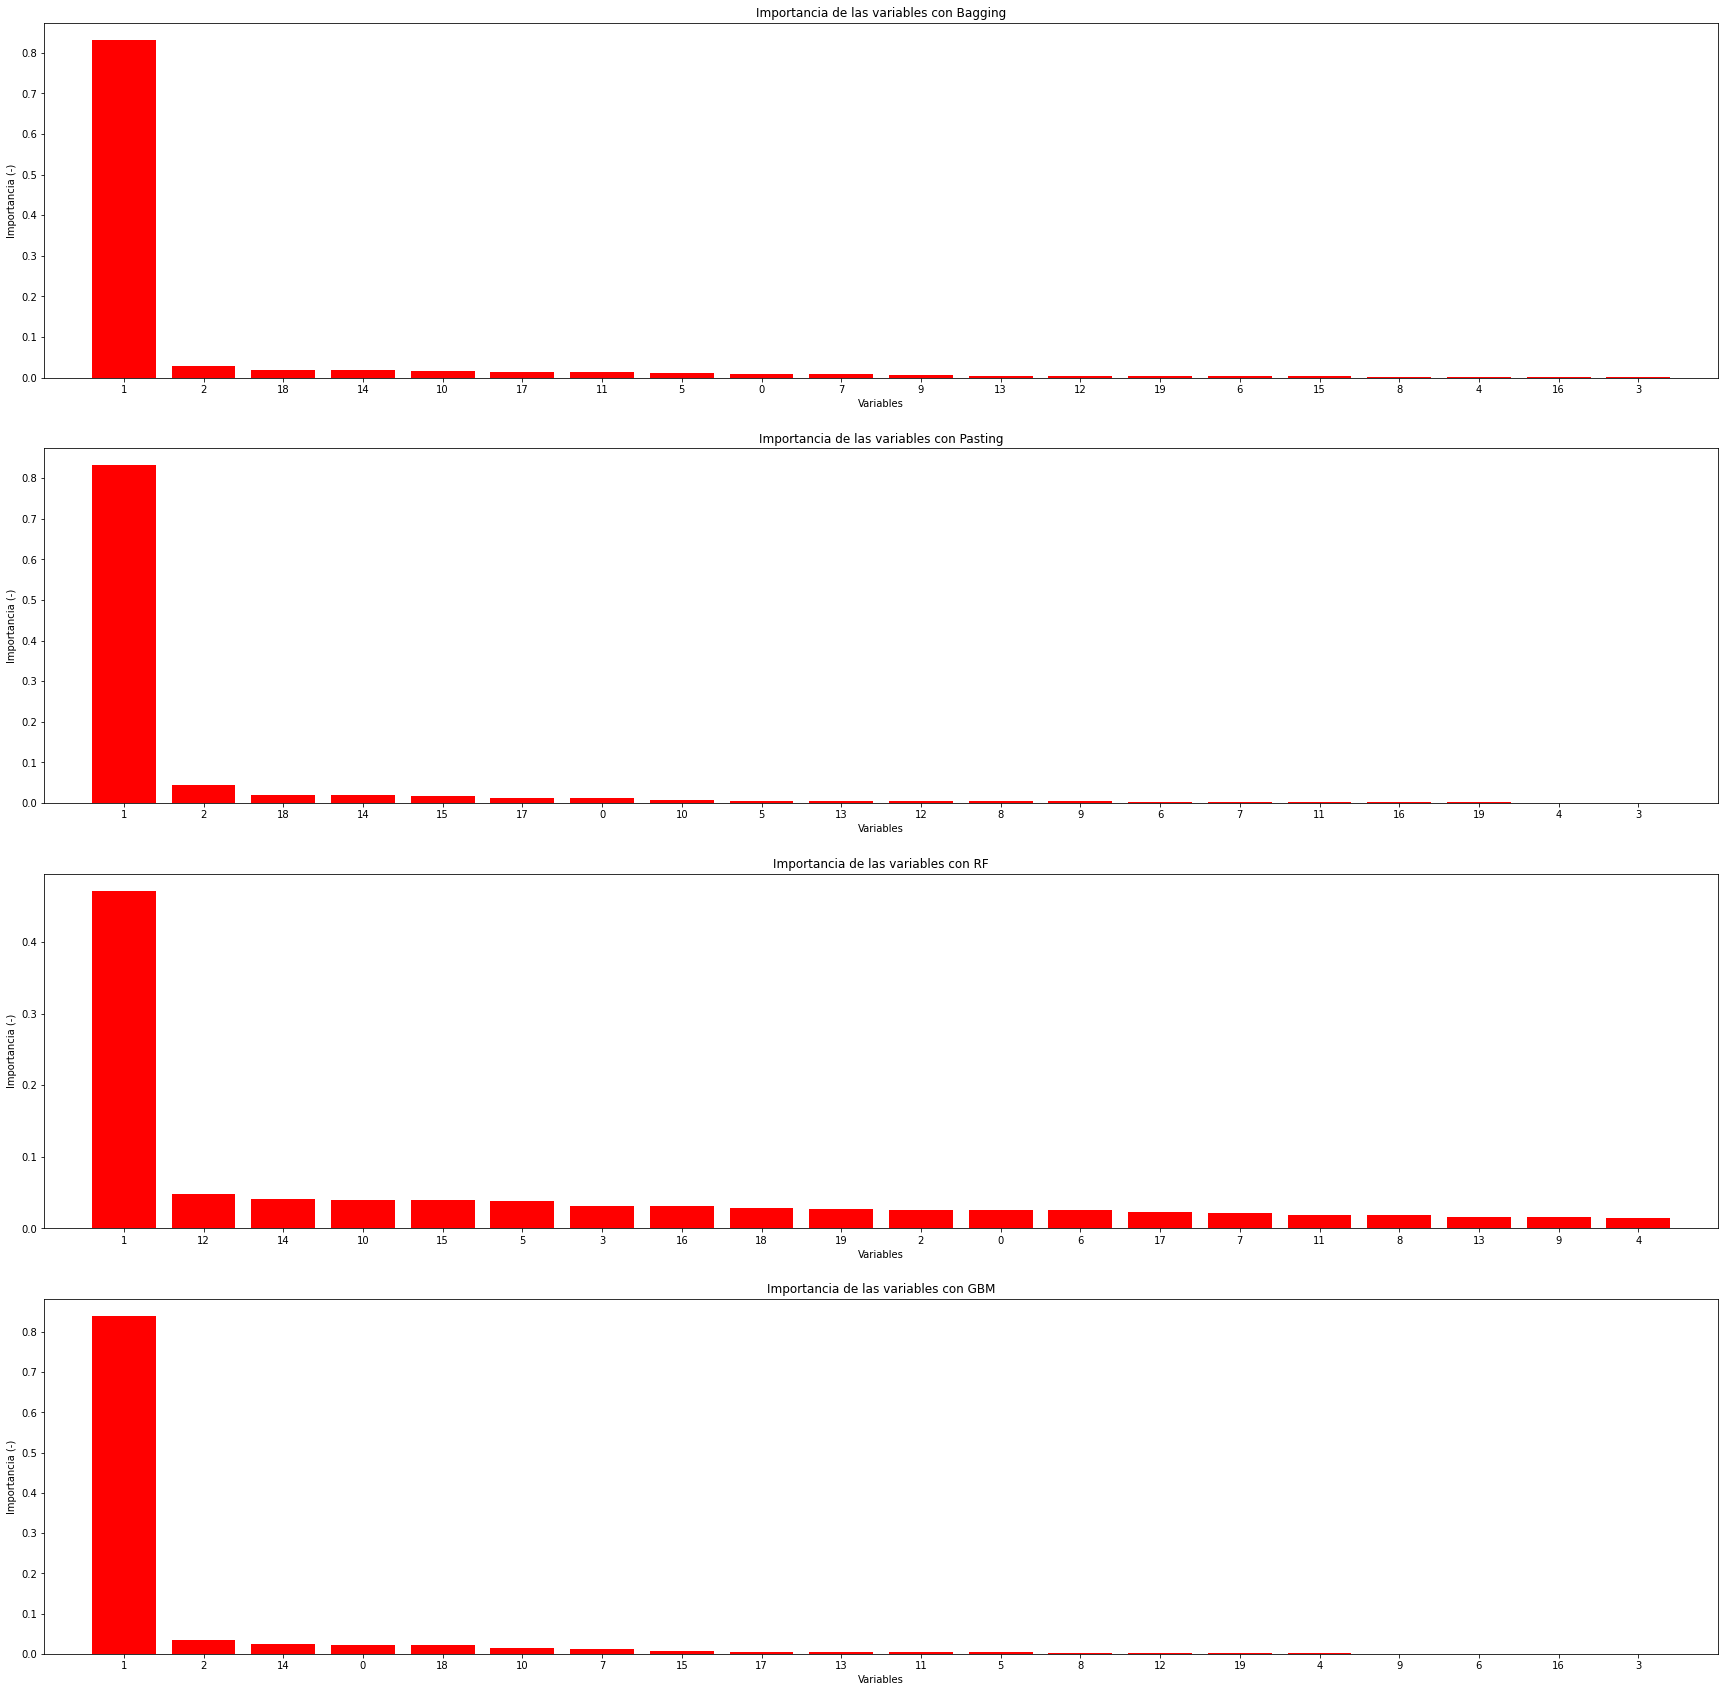

In [ ]:
# dibujar_importancias
plt.figure(figsize = (30, 30))
plt.subplot(4, 1, 1)
plt.title("Importancia de las variables con Bagging") 
plt.bar(range(X.shape[1]), importancias1[indices1],color="r", align="center") 
plt.xticks(range(X.shape[1]),indices1)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.subplot(4, 1, 2)
plt.title("Importancia de las variables con Pasting")
plt.bar(range(X.shape[1]), importancias2[indices2],color="r", align="center")
plt.xticks(range(X.shape[1]), indices2)
plt.xlim([-1, X.shape[1]]) 
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.subplot(4, 1, 3)
plt.title("Importancia de las variables con RF") 
plt.bar(range(X.shape[1]), importancias3[indices3], color="r", align="center") 
plt.xticks(range(X.shape[1]),indices3)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.subplot(4, 1, 4)
plt.title("Importancia de las variables con GBM")
plt.bar(range(X.shape[1]), importancias4[indices4],color="r", align="center") 
plt.xticks(range(X.shape[1]),indices4)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Variables")
plt.ylabel("Importancia (-)")
plt.show()